# Teoría potencial linealizada 2D
La teoría potencial linealizada bidimensional se basa en la resolución de la ecuación de Laplace en dos dimensiones para un fluido incompresible y estacionario. En esta teoría, se asume que las fluctuaciones en la velocidad y la presión son pequeñas en comparación con las velocidades y presiones características del fluido. Frente a una resolución de las ecuaciones en cada punto del espacio discretizado, como podría ser a través del método de elementos o volúmenes finitos, a través del método de singularidades se calcula la velocidad en el campo fluido a través de la integración o sumatorio de la contribución de éstas, como se muestra en la figura inferior. Se emplean manantiales, sumideros, torbellinos, que pueden ser estar localizados de forma puntual, o extendidos en líneas o planos. Esta metodología es la que se utiliza habitualmente en la elaboración de los conocidos Métodos de Paneles o entramados de torbellinos (*Vortex Lattice*)

<p align="center">
  <img width="800" src=/images/Grid_vs_Singularity_Drela.png>
<br><b>Método de malla discretizada frente a método de singularidades. <br>Imagen modificada de <i>"Flight Vehicle Aerodynamics"</i> (MIT Press, 2014)</b>
</p>

## Óvalo de Rankine
El óvalo de Rankine es un modelo matemático que representa un sistema de flujo en dos dimensiones. Se compone de dos singularidades, un manantial y un sumidero, alineados con la corriente incidente. La localización de los puntos de remanso y la forma del óvalo están determinados por la relación entre la intensidad de las singularidades y la corriente incidente, pudiendo estudiarse como una relación de gastos, como se ha visto en las clases de problemas. 

### Código Python para el cálculo del flujo potencial asociado a el óvalo de Rankine
En los siguientes párrafos se presenta una propuesta de cálculo numérico para el modelado discreto del flujo potencial. Existen muchas formas de realizar este cálculo, en este texto se presenta una alternativa sencilla que hace uso del módulo *NumPy* de Python, así como una representación gráfica de la función de corriente y el campo de velocidades.

Nótese que en lo que corresponde al texto escrito en este documento, se usan variables en **negrita** para denotar vectores o matrices.

In [ ]:
# 1. Importación de módulos
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [55]:
# 2. Definición de las funciones de cálculo del campo de velocidades
def velocity_field(x, y, Q, x_s, y_s):
    """
    Calcula el campo de velocidades inducido por una serie finita de manantiales y sumideros.
    
    Parámetros:
    x, y -- coordenadas en el plano xy
    Q -- magnitud de los manantiales/sumideros
    x_s, y_s -- coordenadas de los manantiales/sumideros
    
    Devuelve:
    u, v -- componentes del campo de velocidades
    """
    u = np.zeros_like(x)
    v = np.zeros_like(y)
    N = len(Q)
    for i in range(N):
        r = np.sqrt((x - x_s[i])**2 + (y - y_s[i])**2)
        u += Q[i] * (x - x_s[i]) / (2 * np.pi * r)
        v += Q[i] * (y - y_s[i]) / (2 * np.pi * r)
    return u, v

La función *velocity_field* toma como entrada las coordenadas **x** e **y** en el plano xy, la magnitud **Q** de los manantiales y sumideros, y las coordenadas **x_s**, **y_s** de los manantiales y sumideros. La función devuelve las componentes **u** y **v** del campo de velocidades.

Para calcular las componentes del campo de velocidades, se utiliza un ciclo for que recorre cada uno de los manantiales y sumideros y calcula la contribución de cada uno de ellos en las componentes **u** y **v** utilizando la formulación matemática correspondiente (que puede ser deducida analíticamente a partir de los contenidos teóricos de la asignatura). 

Por ejemplo, la formulación matemática utilizada aqui para calcular la velocidad horizontal inducida por un torbellino de intensidad $Q$, que se encuentra localizado en $(x_Q, y_Q)$, en un punto del espacio, $p$, situado a una distancia radial $r$ del manantial, es la siguiente:
$$ U = \frac{Q}{2\pi r}\cos{\theta} = \frac{Q}{2\pi r} \frac{(x_p-x_Q)}{r}$$

Podemos utilizar esta función para calcular el campo de velocidades en los distintos ejes del sistema de referencia empleado, tanto a nivel vectorial como a nivel puntual, y usar esos datos para visualizar la solución en un gráfico.

In [56]:
# Definimos la magnitud y ángulo de la velocidad incidente
U_inf = 1
alpha = 0

# Definimos las coordenadas de los manantiales y sumideros
Q = np.array([20, -20])
x_s = np.array([-4, 4])
y_s = np.array([0, 0])

# Se definen también sus coordenadas en el plano complejo, para el cálculo del potencial.
z_s = x_s + 1j*y_s
num_sources = len(Q)

# Definimos una malla para las coordenadas x e y
nx, ny = 40, 40
x = np.linspace(-10, 10, nx)
y = np.linspace(-10, 10, ny)
X, Y = np.meshgrid(x, y)
Z = X + 1j*Y

# Calculamos las componentes u y v del campo de velocidades inducido por los manantiales o sumideros
u, v = velocity_field(X, Y, Q, x_s, y_s)

# Añadimos el componente de la velocidad incidente
u += U_inf * np.cos(alpha*np.pi/180)
v += U_inf * np.sin(alpha*np.pi/180)

# Construimos la funcion potencial
pot = 0
for s in range(num_sources):
    pot += Q[s]*np.log(Z-z_s[s]) / (2*np.pi)
pot += U_inf * Z

# De la función potencial extraemos tanto el potencial de velocidades (Phi) como la función de corriente (Psi)
phi = pot.real
psi = pot.imag

Una vez calculados el campo de velocidades, se calcula la función potencial de la forma habitual. Se recuerda que $f(t) = \Phi - i\Psi$, por lo que tras construir $f(t)$ es sencillo extraer tanto el potencial de velocidades, $\Phi$, como la función de corriente, $\Psi$.

Tras la fase de cálculo, es conveniente representar gráficamente la solución. Para ello hacemos uso de las funciones *contourf* y *contour* de Matplotlib, para representar el campo de la Función de Corriente ($\Psi$), y la línea de corriente correspondiente a $\Psi=0$.

Por último, empleamos la función *quiver* para representar el campo de velocidades vectorial de forma más visual. Por defecto, esta función representa la longitud de los vectores de forma inversa a su magnitud, por lo que aquí se realiza una normalización previa.
Aunque sabemos que $\Phi = U -iW$, disponemos del campo de velocidades calculado previamente, en las variables **u** y **v**.

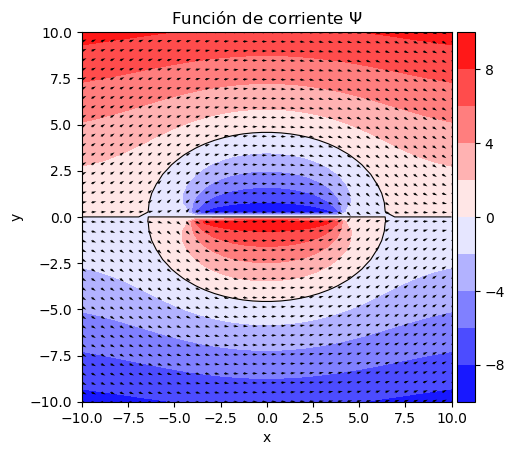

In [ ]:
psi0 = np.where(psi==0)
print(psi0)

# Visualizamos la función de corriente
fig, ax = plt.subplots()                                            # Create figure
divider = make_axes_locatable(ax)                                   # Ajustamos la posición de la barra de niveles
cax = divider.append_axes('right', size='5%', pad=0.05)

cont = ax.contourf(X, Y, psi, 10, cmap='bwr')                       # Pintamos los contornos
ax.contour(X, Y, psi, levels=[0], colors=['black'], linewidths=0.8) # Representamos la línea de corriente psi=0    
fig.colorbar(cont, cax=cax, orientation='vertical')                 # Pintamos la barra de niveles

N = np.sqrt(u**2 + v**2)                                                
ax.quiver(X, Y, u/N, v/N)                                           # Representamos el campo vectorial normalizado

ax.set_xlabel('x')                                                  # Etiquetamos de forma apropiada, y mostramos en pantalla
ax.set_ylabel('y')
ax.set_title(r'Función de corriente $\Psi$')
#ax.set(xlim=(-3, -1), ylim=(-1, 1))
ax.set_aspect('equal','box')
# plt.show()

De igual forma, podríamos representar el campo de velocidades tanto horizontal como vertical.

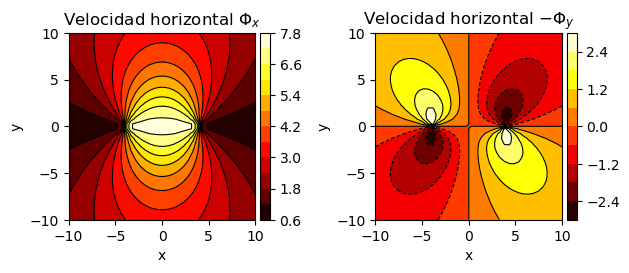

In [58]:
# Visualizamos el campo de velocidades y la función de corriente
fig, axes = plt.subplots(1,2) 
ax1, ax2 = axes.flatten()                                           # Create figure

dividerU = make_axes_locatable(ax1)                                   # Ajustamos la posición de la barra de niveles en U
caxU = dividerU.append_axes('right', size='5%', pad=0.05)
dividerV = make_axes_locatable(ax2)                                   # Ajustamos la posición de la barra de niveles en V
caxV = dividerV.append_axes('right', size='5%', pad=0.05)

ax1.set_title(r'Velocidad horizontal $\Phi_x$')
cont = ax1.contourf(X, Y, u, 10, cmap='hot')                       # Pintamos los contornos de U
ax1.contour(X, Y, u, levels=10, colors=['black'], linewidths=0.8)  # Representamos lineas de isocontornos
fig.colorbar(cont, cax=caxU, orientation='vertical')                # Pintamos la barra de niveles

ax2.set_title(r'Velocidad horizontal $-\Phi_y$')
cont = ax2.contourf(X, Y, v, 10, cmap='hot')                       # Pintamos los contornos
ax2.contour(X, Y, v, levels=10, colors=['black'], linewidths=0.8) # Representamos la línea de corriente psi=0    
fig.colorbar(cont, cax=caxV, orientation='vertical')                 # Pintamos la barra de niveles


for ax in axes:
    ax.set_xlabel('x')                                                  # Etiquetamos de forma apropiada, y mostramos en pantalla
    ax.set_ylabel('y')
    #ax.set(xlim=(-3, -1), ylim=(-1, 1))
    ax.set_aspect('equal','box')
plt.tight_layout()
plt.show()